In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

In [19]:
data = pd.read_csv('covid_19_clean_complete.csv')

print(data.head())

data = data.dropna()
data = data.drop_duplicates()

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


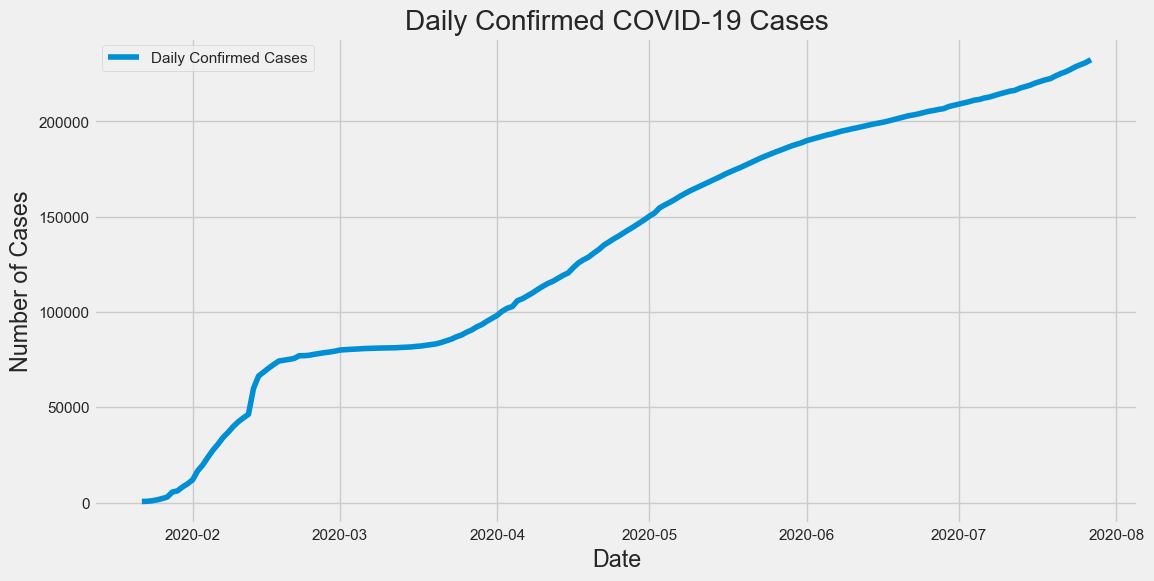

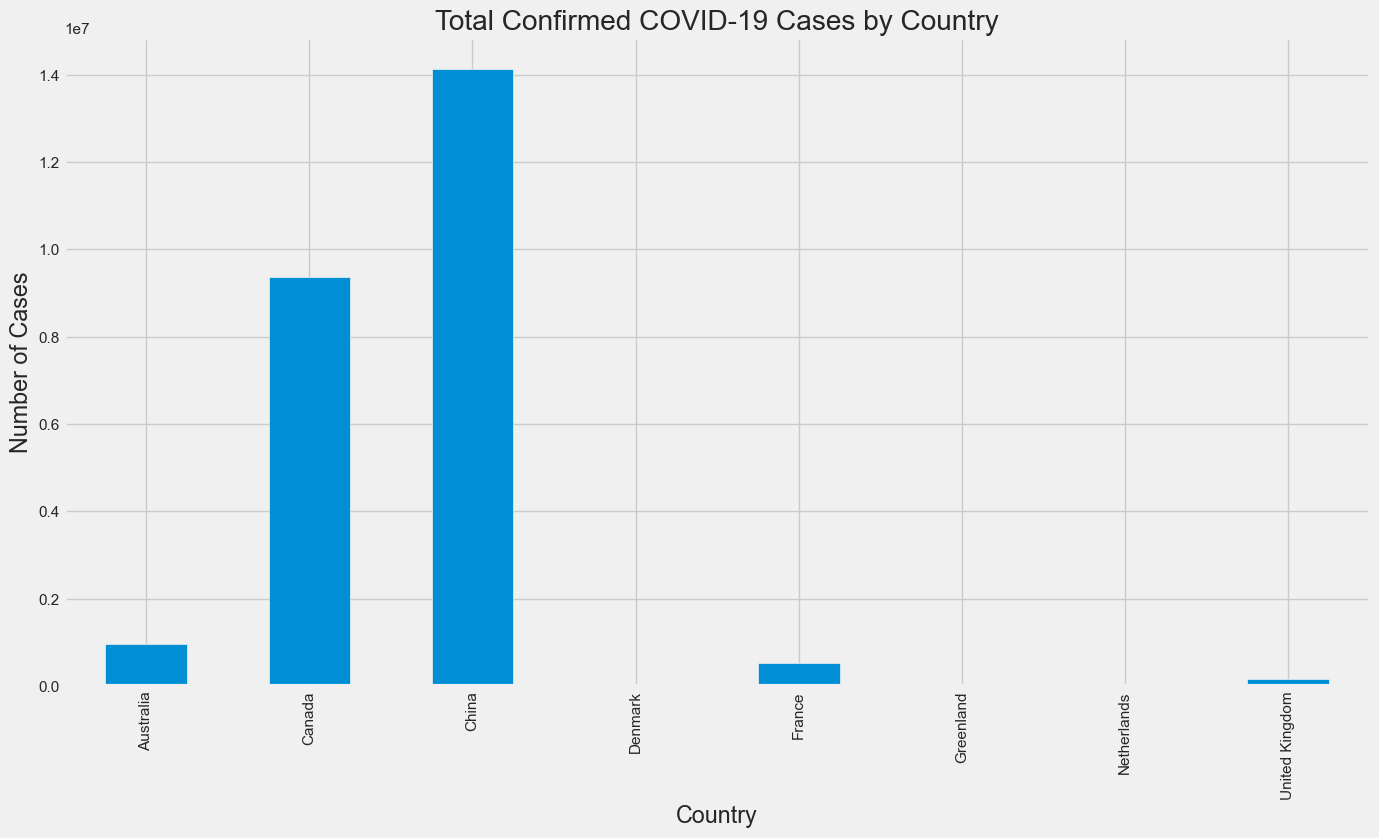

In [21]:
data['Date'] = pd.to_datetime(data['Date'])

daily_cases = data.groupby('Date').sum()['Confirmed']
plt.figure(figsize=(12, 6))
plt.plot(daily_cases, label='Daily Confirmed Cases')
plt.title('Daily Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

numeric_columns = data.select_dtypes(include=[np.number]).columns
country_cases = data.groupby('Country/Region')[numeric_columns].sum()['Confirmed']
plt.figure(figsize=(15, 8))
country_cases.plot(kind='bar')
plt.title('Total Confirmed COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.show()

Mean Squared Error: 86324708.79614426


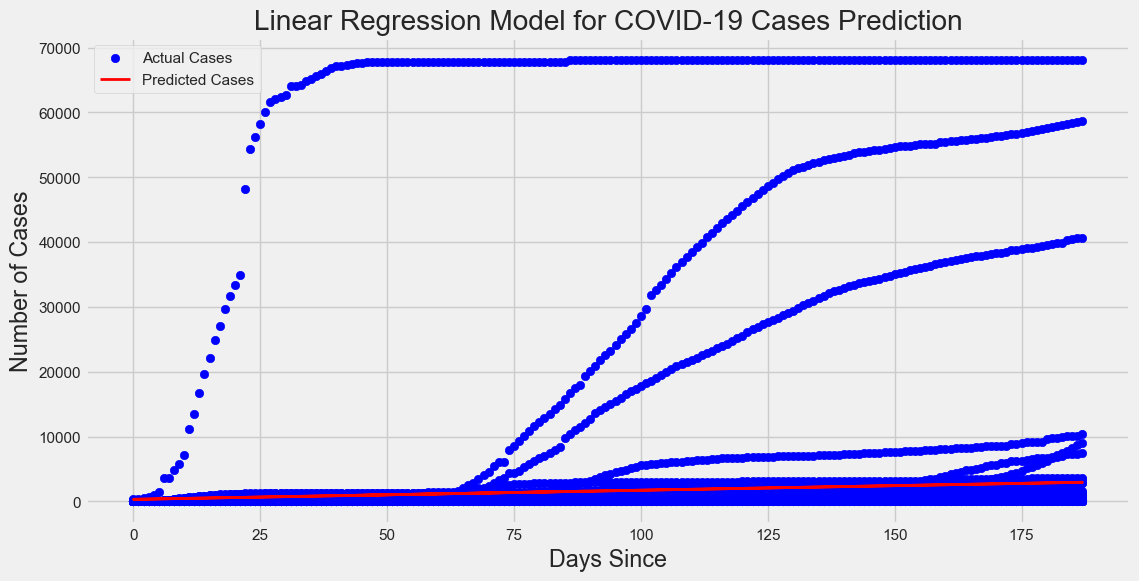

In [23]:
data['Days Since'] = (data['Date'] - data['Date'].min()).dt.days
X = data['Days Since'].values.reshape(-1, 1)
y = data['Confirmed'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Cases')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Cases')
plt.title('Linear Regression Model for COVID-19 Cases Prediction')
plt.xlabel('Days Since')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

C:\Users\Elbraa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.0151
Epoch 2/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0167
Epoch 3/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0149
Epoch 4/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0145
Epoch 5/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0107
Epoch 6/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0121
Epoch 7/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0074
Epoch 8/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0061
Epoch 9/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0043
Epoch 10/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0030
Epoch 11/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0035
Epoch 12/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0028
Epoch 13/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0022
Epoch 14/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0015
Epoch 15/50
367/367 ━━━━━━━━━━━━━━━━━━━━ 6

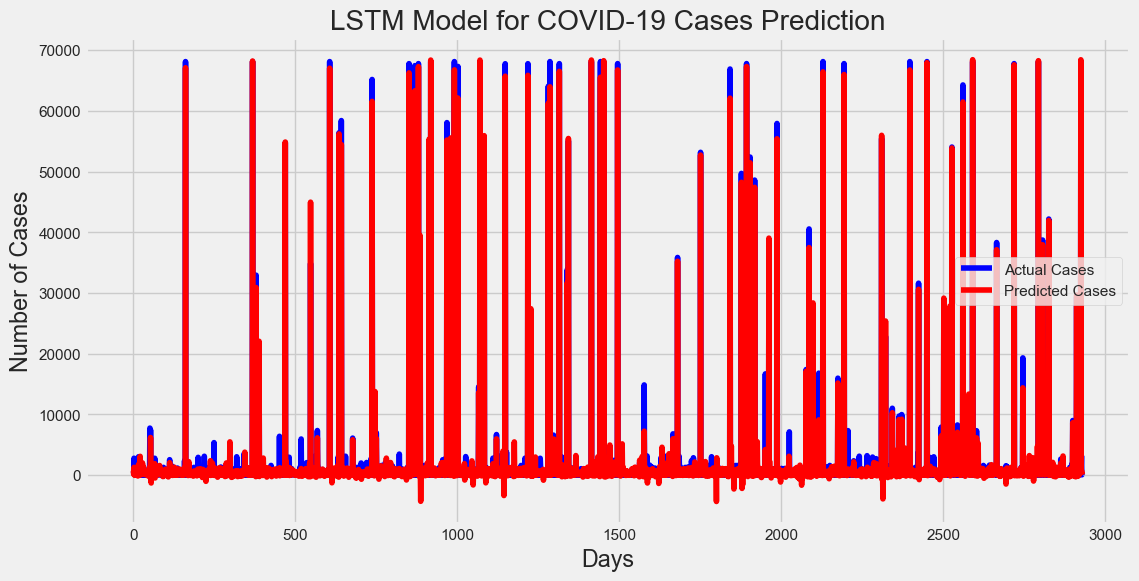

In [25]:
data = data.set_index('Date')
cases = data['Confirmed'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_cases = scaler.fit_transform(cases)

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
X = create_sequences(scaled_cases, seq_length)
y = scaled_cases[seq_length:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Cases')
plt.plot(y_pred, color='red', label='Predicted Cases')
plt.title('LSTM Model for COVID-19 Cases Prediction')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()